In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [16]:
def eq1(df,k1):
    return df.to_numpy()[k1-1:]

def eq12(df,k1,k2):
    return arr.to_numpy()[k1-1:k2-1]

def mean(A,N):
    return np.sum(A)/N

def meanw(A,w,N):
    return np.sum(np.multiply(A,w))/N

def nw(N,w):
    return N**2/np.sum(np.square(w))

def var(A,a,N):
    return np.sum(np.square(A-a))/(N-1)

def varw(A,a,N,nw):
    return np.sum(np.multiply(np.square(A-a),w))*(nw)/(N*(nw-1.0))

def autocorr(A,N,a,v,cutoff=200):
    C = np.zeros(min(N-1,cutoff))
    for i in range(0,cutoff-1):
        C[i] = np.sum(np.multiply((A[0:N-i-1]-a),(A[i:N-1]-a)))/(v*(N-i))
    return C

def autocorrw(A,w,N,a,v,cutoff=200):
    C = np.zeros(min(N-1,cutoff))
    p = np.sum(np.sqrt(np.multiply(w[0:N-i-1],w[i:N-1])))
    for i in range(0,cutoff-1):
        C[i] = np.sum(np.multiply(np.multiply((A[0:N-i-1]-a),(A[i:N-1]-a)),np.sqrt(np.multiply(w[0:N-i-1],w[i:N-1]))))/(v*p)
    return C

def corrtime(autocorr):
    return 1 + 2*np.sum(np.multiply(autocorr,autocorr>0))

def neff(N,corrtime):
    return N/corrtime

def neffw(nw,corrtime):
    return nw/corrtime

def err(v,neff):
    return np.sqrt(v/neff)

def statfor(A,cutoff=200):
    N = len(A); a = mean(A,N); v = var(A,a,N)
    C = autocorr(A,N,a,v,cutoff)
    kappa = corrtime(C)
    Neff  = neff(N,kappa)
    error = err(v,Neff)
    return (N,a,v,C,kappa,Neff,error)

def statforw(A,w,cutoff=200):
    N = sum(w); a = meanw(A,w,N); Nw = nw(N,w); v = varw(A,a,w,Nw)
    C = autocorrw(A,w,N,a,v,cutoff)
    kappa = corrtime(C)
    Neff  = neffw(Nw,kappa)
    error = err(v,Neff)
    return (N,a,v,C,kappa,Neff,error)

In [17]:
data = pd.read_csv("out.csv")
dat = list(data.groupby('beta'))
beta = np.zeros(len(dat))
for i in range(0,len(dat)):
    beta[i]=dat[i][0]
print(beta)

[1.5  1.51 1.52 1.53 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63
 1.64 1.65 1.66 1.67 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77
 1.78 1.79 1.8  1.81 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9 ]


In [19]:
#EK,EP,ET,p,{r,x,y,z}_i
vals = np.zeros([len(dat),len(dat[0][1].iloc[0])-2,2])
for i in range(0,len(dat)):
    for j in range(2,len(dat[0][1].iloc[0])-2):
        stat = statfor(eq1(dat[i][1].iloc[:,j],10000))
        vals[i,j-2,0] = stat[1]
        vals[i,j-2,1] = stat[6]


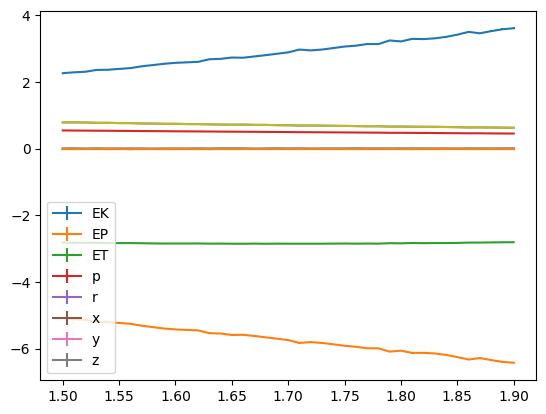

In [20]:
for j in range(0,len(dat[0][1].iloc[0])-2):
    plt.errorbar(beta,vals[:,j,0],vals[:,j,1])
plt.legend(["EK","EP","ET","p","r","x","y","z"])

1.686116471854027


Text(0, 0.5, 'ET')

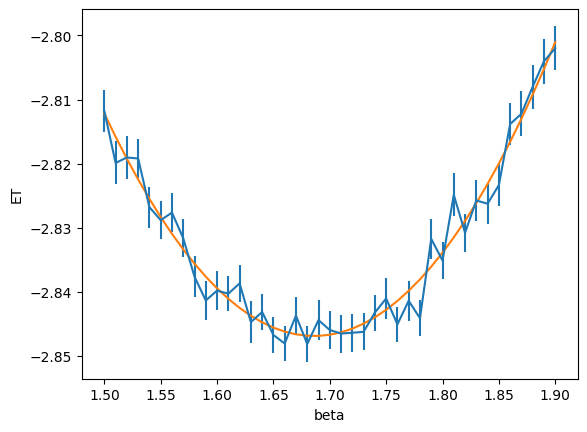

In [21]:
fit = np.polyfit(beta,vals[:,2,0],2)
print(-fit[1]/(2*fit[0]))
fitf = np.poly1d(fit)
plt.errorbar(beta,vals[:,2,0],vals[:,2,1])
plt.plot(beta,fitf(beta))
plt.xlabel("beta")
plt.ylabel("ET")

Text(0, 0.5, 'E')

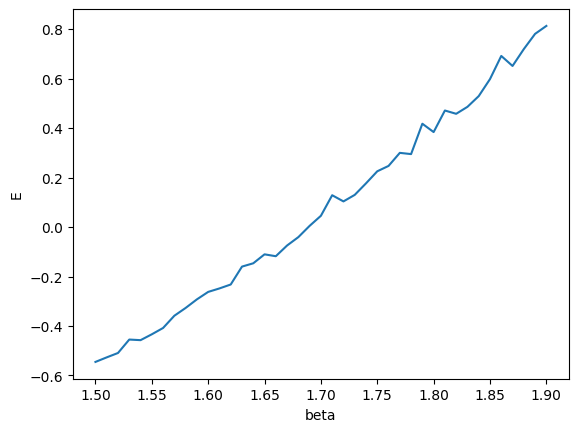

In [22]:
plt.plot(beta,2*vals[:,0,0]+vals[:,1,0])
plt.xlabel("beta")
plt.ylabel("E")

Text(0, 0.5, 'p')

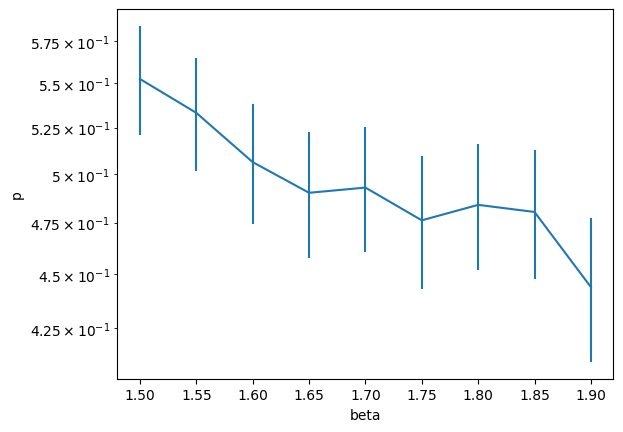

In [12]:
plt.errorbar(beta,vals[:,3,0],vals[:,3,1])
plt.yscale("log")
plt.xlabel("beta")
plt.ylabel("p")

Text(0, 0.5, 'r')

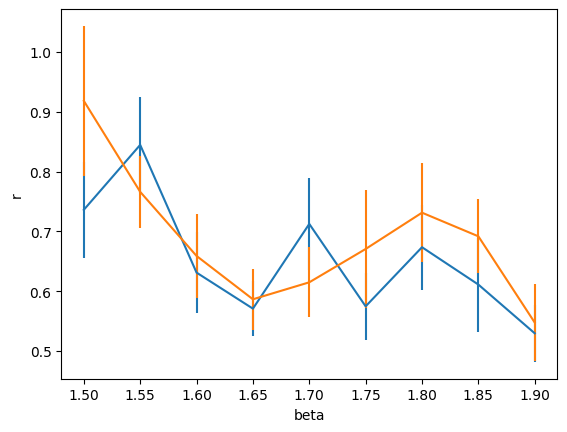

In [13]:
plt.errorbar(beta,vals[:,4,0],vals[:,4,1])
plt.errorbar(beta,vals[:,8,0],vals[:,8,1])
plt.xlabel("beta")
plt.ylabel("r")

Text(0, 0.5, 'x,y,z')

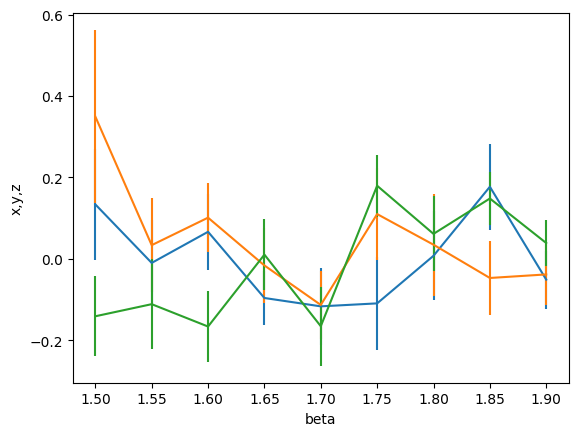

In [14]:
plt.errorbar(beta,vals[:,7,0],vals[:,7,1])
plt.errorbar(beta,vals[:,6,0],vals[:,6,1])
plt.errorbar(beta,vals[:,5,0],vals[:,5,1])
plt.xlabel("beta")
plt.ylabel("x,y,z")